Plot the signal in all PMTS as a function of time, for a given time window

In [160]:
#Import everything we need
import numpy as np
import numba
# This just ensures some comments in dataframes below display nicely
import pandas as pd
pd.options.display.max_colwidth = 100
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import tqdm

In [2]:
#Import strax and the context
import strax
import straxen
#st = straxen.contexts.demo()
st = straxen.contexts.strax_workshop_dali()

In [6]:
straxen.download_test_data()

In [63]:
#Download one of the datasets and pull out the 'records'
run_id = '180215_1029'
df = st.get_array(run_id, 'records')

In [183]:
#Use numba to go faster
#Had to relocate the 'fullplot' array creation outside the function for whatever reason

@numba.njit
def plot_all_channels(record_df,start,end,tbins,fullplot,npmts=248):
    tstep = (end-start)/tbins
    relevantpulses = df['time'] >= start
    relevantpulses &= df['time'] < end
    mypulses = df[relevantpulses]
    for x in mypulses:
        this_start_t = x['time']
        this_timestep = x['dt']
        this_pmt = x['channel']
        for i,v  in enumerate(x['data']):
            this_t = this_start_t+this_timestep*i
            this_sample = np.int((this_t-start)/tstep)
            fullplot[this_pmt,this_sample] += v
    
    return fullplot

In [239]:
#Define Parameters for plotting
start_time = min(df['time']) #ns
end_time = start_time + 1e9 #ns
timebins = 500
fullplot = np.zeros((248,timebins),dtype=np.int)
myarray = plot_all_channels(df,start_time,end_time,timebins,fullplot)

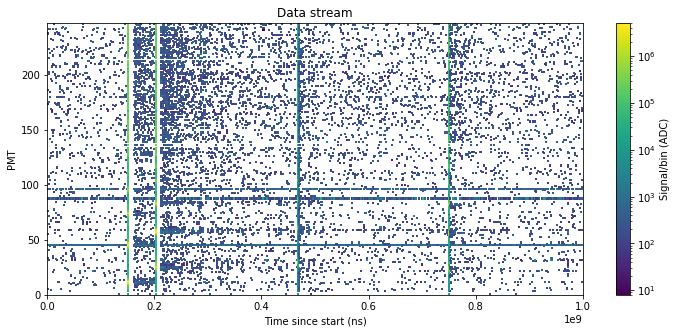

In [240]:
#plot the data on PMT vs. time axes
xbins = np.linspace(start_time,end_time,timebins) - start_time 
ybins = np.linspace(0,247,248)
plt.figure(figsize=[12,5])
plt.pcolormesh(xbins,ybins,fullplot,norm=clr.LogNorm())
plt.xlabel('Time since start (ns)')
plt.ylabel('PMT')
plt.title('Data stream')
plt.colorbar(label='Signal/bin (ADC)')


In [232]:
# Get PMT positions from the XENON1T config
from ast import literal_eval
import configparser
config = configparser.ConfigParser()
config.read_string(
    straxen.get_resource('https://raw.githubusercontent.com/XENON1T/pax/master/pax/config/XENON1T.ini'))
pmt_positions = np.array([
    (q['position']['x'], q['position']['y'])
    for q in literal_eval(config['DEFAULT']['pmts'])])[:248]

In [233]:
pmt_positions

array([[-1.23456685e+01,  4.60746619e+01],
       [-4.15732893e+00,  4.75184871e+01],
       [ 4.15732893e+00,  4.75184871e+01],
       [ 1.23456685e+01,  4.60746619e+01],
       [ 2.01588911e+01,  4.32308814e+01],
       [ 2.73595960e+01,  3.90735525e+01],
       [ 3.37289935e+01,  3.37289935e+01],
       [ 3.90735525e+01,  2.73595960e+01],
       [ 4.32308814e+01,  2.01588911e+01],
       [ 4.60746619e+01,  1.23456685e+01],
       [ 4.75184871e+01,  4.15732893e+00],
       [ 4.75184871e+01, -4.15732893e+00],
       [ 4.60746619e+01, -1.23456685e+01],
       [ 4.32308814e+01, -2.01588911e+01],
       [ 3.90735525e+01, -2.73595960e+01],
       [ 3.37289935e+01, -3.37289935e+01],
       [ 2.73595960e+01, -3.90735525e+01],
       [ 2.01588911e+01, -4.32308814e+01],
       [ 1.23456685e+01, -4.60746619e+01],
       [ 4.15732893e+00, -4.75184871e+01],
       [-4.15732893e+00, -4.75184871e+01],
       [-1.23456685e+01, -4.60746619e+01],
       [-2.01588911e+01, -4.32308814e+01],
       [-2.